# Execute the code below

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

link = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather2019.csv"
df_weather = pd.read_csv(link)


# You have now a DataFrame with lots of weather data

In [2]:
df_weather.head(20)

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,PRESSURE_MAX_MB,CLOUDCOVER_AVG_PERCENT,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C,WEATHER_CODE_MORNING,WEATHER_CODE_NOON,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION,MONTH,DAY
0,2019-01-01,9,4,10,4,7,8,0.2,94,9.000,1037,62.250,9,6,3,116,143,176,0,1,5.1,very bad,1,1
1,2019-01-02,8,5,18,7,7,5,0.0,90,9.000,1040,58.125,8,6,3,119,116,116,0,1,8.7,very bad,1,2
2,2019-01-03,6,0,18,0,4,3,0.0,88,10.000,1040,37.000,6,1,-4,116,116,116,0,1,8.7,very bad,1,3
3,2019-01-04,5,-1,15,-1,4,3,0.0,91,10.000,1040,42.625,5,1,-4,116,116,122,0,1,5.1,very bad,1,4
4,2019-01-05,6,-1,8,-1,4,3,0.0,91,8.000,1040,17.250,6,2,-2,143,116,116,0,1,8.7,very bad,1,5
5,2019-01-06,5,2,7,2,4,4,0.0,87,7.375,1039,70.500,5,3,1,116,122,122,0,1,3.3,very bad,1,6
6,2019-01-07,10,4,9,4,8,8,0.0,95,5.000,1039,71.125,10,7,3,143,143,116,0,1,5.1,very bad,1,7
7,2019-01-08,10,6,18,6,10,8,0.2,93,8.625,1036,72.000,10,8,5,143,176,176,0,1,3.3,bad,1,8
8,2019-01-09,7,5,18,4,7,6,0.0,83,9.000,1031,66.000,7,4,3,143,122,119,0,1,3.3,very bad,1,9
9,2019-01-10,7,1,14,1,5,5,0.1,93,8.000,1031,33.625,7,2,-2,143,116,176,0,1,8.7,very bad,1,10


# Now, complete the following tasks :

## First of all, you have to create a scatterplot with max (in red) and min (in blue) temperatures located on the same graph

There are lots of colors to chose from here : https://python-graph-gallery.com/100-calling-a-color-with-seaborn/

Create a scatterplot :
- with max (in red) and min (in blue) temperatures on the same graph
- Y-axis for temperatures
- X-axis for dates
- Include legend, readable axis ticks, and title

Here is an example of what is expected :

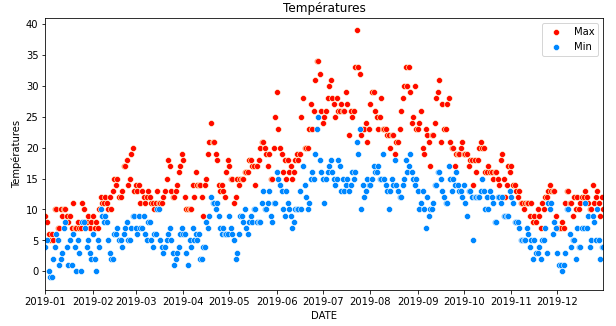


In [3]:
# transformer la colonne date en datetime
df_weather['DATE'] = pd.to_datetime(df_weather['DATE'], format='%Y-%m-%d')


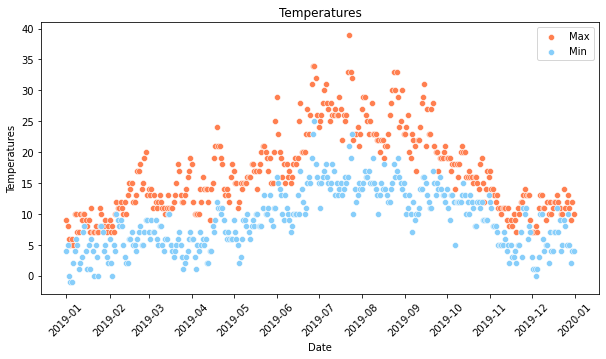

In [4]:
# Of course, you'll add legend, readable axis ticks, and title (there is no seaborn function for that, use matplotlib syntax)
# It's up to you:
import matplotlib.dates as mdates

plt.figure(figsize=(10,5))
sns.scatterplot(x="DATE", y="MAX_TEMPERATURE_C",data=df_weather, color= "coral", label = "Max")
sns.scatterplot(x="DATE", y="MIN_TEMPERATURE_C", data=df_weather, color="lightskyblue", label="Min")

plt.legend()
plt.xlabel("Date")
plt.ylabel("Temperatures")
plt.title("Temperatures")

month_interv = mdates.MonthLocator(interval=1)
plt.gca().xaxis.set_major_locator(month_interv)
plt.xticks(rotation= 45)
plt.show()

## Colorize with hue argument, to show the criterias of the opinion columns

With Seaborn, you can use the "data" argument to indicate your DataFrame, syntax will be prettier.

Here is an example of what is expected :

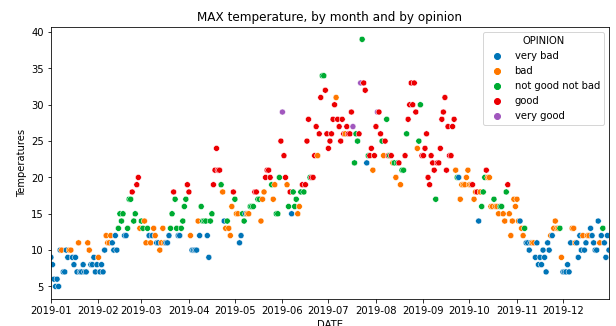

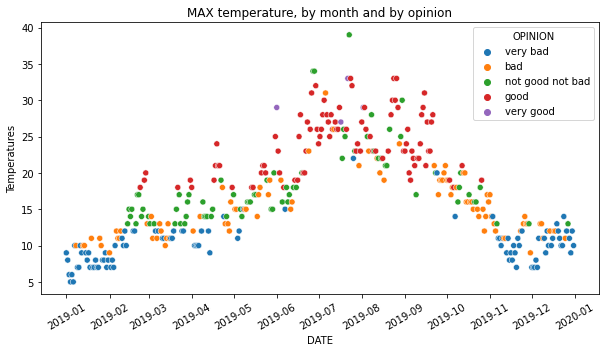

In [5]:
# Of course, you'll add legend, readable axis ticks, and title (there is no seaborn function for that, use matplotlib syntax)
# It's up to you:
plt.figure(figsize=(10, 5))
sns.scatterplot(x="DATE", y="MAX_TEMPERATURE_C", data=df_weather, hue="OPINION")
plt.xlabel('DATE')
plt.ylabel('Temperatures')
plt.title('MAX temperature, by month and by opinion')
month_interv = mdates.MonthLocator(interval=1)
plt.gca().xaxis.set_major_locator(month_interv)
plt.xticks(rotation= 30)
plt.show()

## Correlation coefficient and heatmap - change the palette and interpretation

For more information : https://www.statisticshowto.com/probability-and-statistics/correlation-coefficient-formula/





What does it mean ? Could you interpret this ? Why the diagonal value is `1` ? And why there is a blank column and a blank row ?

Could you find the less correlated columns ? Be careful : the less correlated columns are those with a correlated coefficient close to 0, not -1.

Let's modify it to be more readable.
Please change the palette (`cmap`) to a more beautiful one. Chose a "diverging" palette in this page https://seaborn.pydata.org/tutorial/color_palettes.html and `center` it on 0.



Here is an example of what is expected (but you can improve colors) :

![ ](https://storage.googleapis.com/quest_editor_uploads/Ci9AZJdBsnuTx7z8XuZRTbvoCi3uON5r.png)

Then, please add a title of course.

Try to interpret it : which columns are most correlated with MAX Temperature ? Positively and negatively ? Do you think it's logical ?

Each square shows the correlation between our variables (our columns). The range is -1 to 1. Values which are closer to 1 have a positive correlation. Values closer to -1 have a negative correlation. Which one closer to 0 means that there isn't a linear trend between them. 
The diagonal value is one because each variable is correlated to itself so its a perfect correlation. 

the total_snow column is blank because all the values in this variable are equal to 0.

The less correlated columns are :
- precip & min_temp
- precip & temp_morning
- precip & dewpoint max
- max_temp & pressure
- min_temp & weather code morning
- temp_evening & pressure
- windspeed & humidity
- windspeed & pressure
- visibilty & dewpoint
- visibilty & uv_index
- uv_index & pressure
- day and pretty all the other variables : the day of the month is not an indication of the weather. 


the variables the most corraleted with Max_temp :
- positive correlation :
  - Min_temperature ==> logical because when it get cold the min and max temperature are decreasing and when they get warmer it's the inverse
  - Temperature_morning / temperature_Noon / temperature_evening: logical for the same reason but during the day
  - Heatindex / dewpoint / windtemp ==> logical because its goes with the temperature.

- negative correlation :
  - Humidity : when the temperatures are higher, the humidity is decreasing



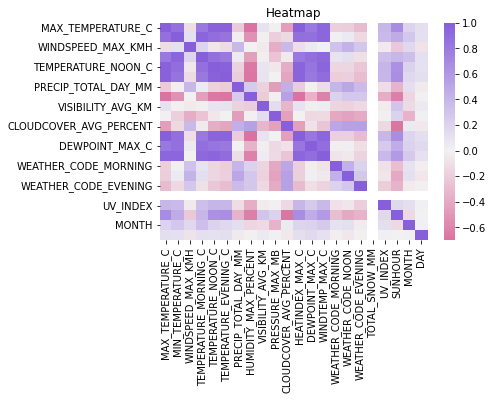

In [6]:
# It's your turn now :
cmap_color= sns.diverging_palette(350, 275,  as_cmap=True)
sns.heatmap(df_weather.corr(), cmap=cmap_color, center=0)
plt.title('Heatmap')
plt.show()


# correlated columns : All the columns in dark purple
# the less correlated are in white or light color

## Pair Plot - Colorize the opinions
Another way, and more visual way, to see correlation, is just to plot each column 2 by 2, that's a pairplot. But it's slow to compute on the whole dataset.

- Creates a slice of 10 columns (including the "OPINION" column)
- Creates a sample of this slice
- Draw a Pairplot on this sample, and colorize it by `OPINION`

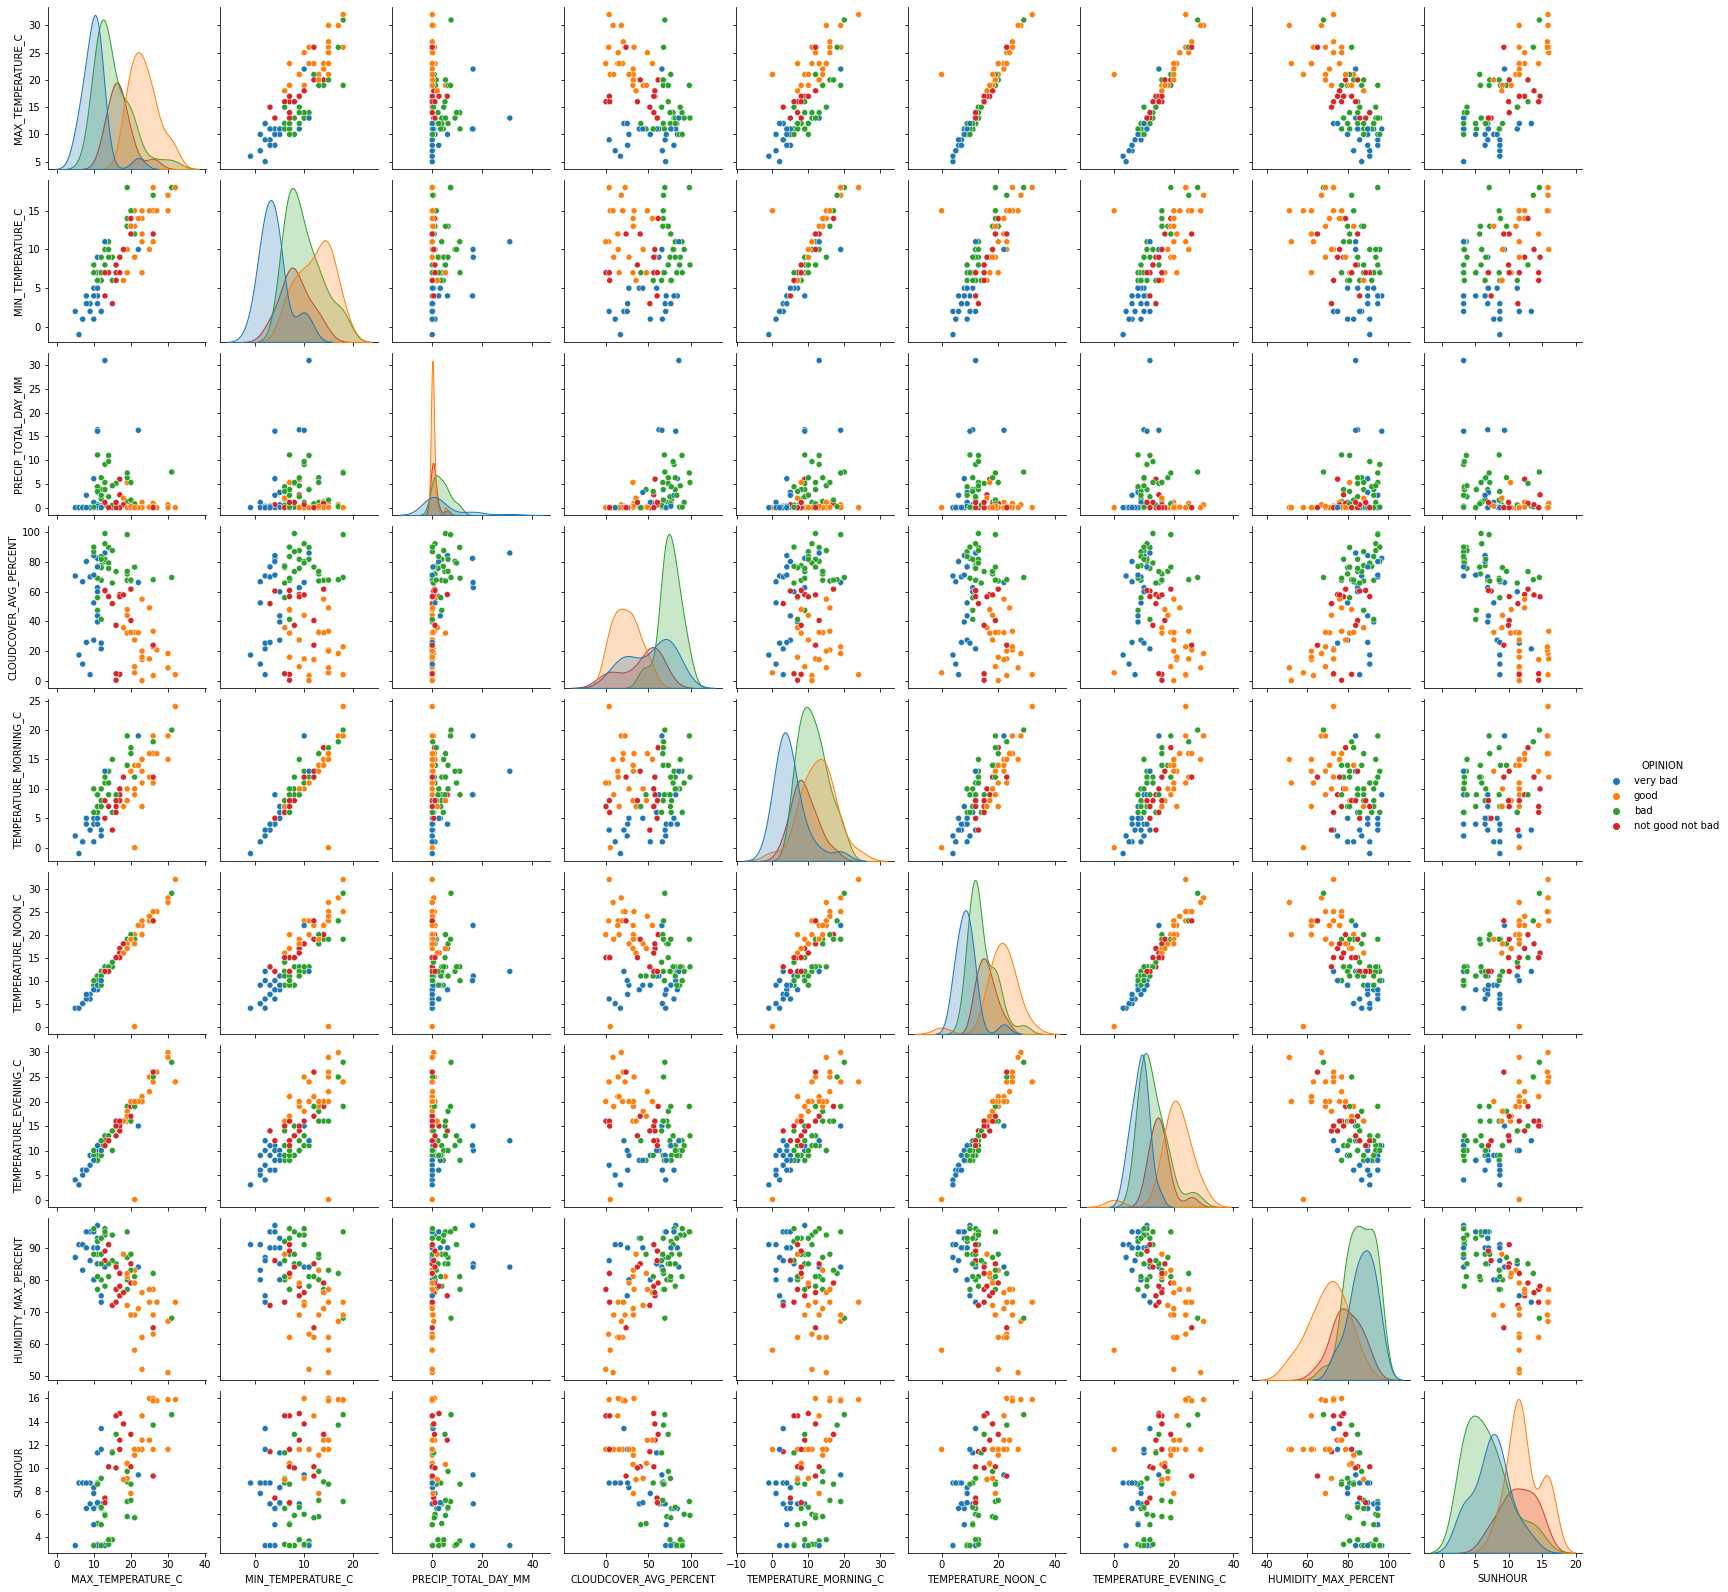

In [7]:
# It's your turn:
slice_df = df_weather[['MAX_TEMPERATURE_C', 'MIN_TEMPERATURE_C', 'PRECIP_TOTAL_DAY_MM', 'CLOUDCOVER_AVG_PERCENT','TEMPERATURE_MORNING_C', 
                       'TEMPERATURE_NOON_C', 'TEMPERATURE_EVENING_C', 'HUMIDITY_MAX_PERCENT',  'SUNHOUR', 'OPINION']]


sample_slice = slice_df.sample(frac=0.25, random_state=1)

sns.pairplot(sample_slice, hue ="OPINION")
plt.show()

## Linear regression

With `regplot`, you can plot a regresion line. It's very simple, but here, it's not very adapted, because our 2 columns seems not correlated. But you know lots of correlated columns with MAX Temperature.
Replace the X-axis with a positively correlated columns, then plot another regplot with a negative correlation.

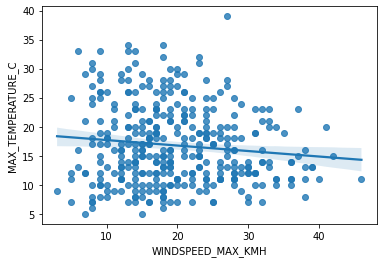

In [8]:

sns.regplot(x='WINDSPEED_MAX_KMH', y='MAX_TEMPERATURE_C', data = df_weather)
plt.show()


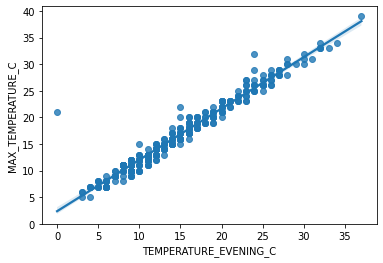

In [9]:
# Display a regplot with a positive correlation:
sns.regplot(x='TEMPERATURE_EVENING_C',y='MAX_TEMPERATURE_C', data = df_weather)
plt.show()

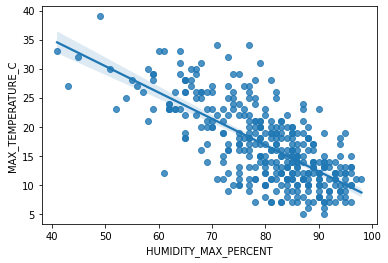

In [10]:
# Display a regplot with a negative correlation:
sns.regplot(x='HUMIDITY_MAX_PERCENT', y='MAX_TEMPERATURE_C', data = df_weather)
plt.show()

# More and more...
Draw 4 different charts of your choice (you're an analyst, you have to be force of proposal), on the same figure, to represent which season has better weather.

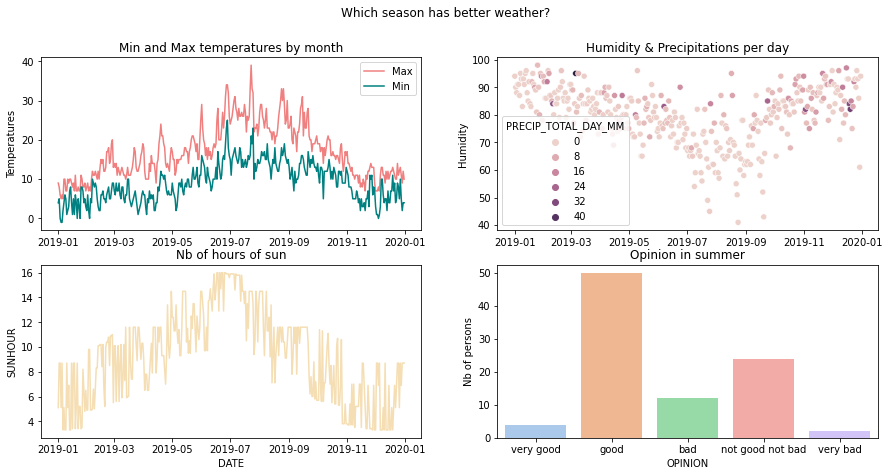

In [12]:
# Your code here

fig, ax = plt.subplots(2,2, figsize=(15,7))
fig.suptitle("Which season has better weather?")

#fig 1 : les temperatures les plus hautes sont en été
sns.lineplot(ax=ax[0,0], x="DATE", y="MAX_TEMPERATURE_C", data=df_weather, color="lightcoral", label = "Max")
sns.lineplot(ax=ax[0,0], x="DATE", y="MIN_TEMPERATURE_C", data=df_weather, color= "teal", label="Min")
ax[0,0].set_title("Min and Max temperatures by month")
ax[0,0].set_ylabel('Temperatures')
ax[0,0].set_xlabel('')


# fig 2 : moins de précipitations en été
sns.scatterplot(ax = ax[0,1], x="DATE", y="HUMIDITY_MAX_PERCENT", data=df_weather, hue="PRECIP_TOTAL_DAY_MM")
ax[0,1].set_title("Humidity & Precipitations per day")
ax[0,1].set_xlabel('')
ax[0,1].set_ylabel('Humidity')


# fig 3: plus d'heures de soleil en été
sns.lineplot(ax=ax[1,0], x="DATE", y="SUNHOUR", data=df_weather, color ="wheat")
ax[1,0].set_title("Nb of hours of sun")


# fig 4 : opinion per season
summer = df_weather[df_weather['DATE'].dt.month.isin([6, 7, 8,])]
sns.countplot(ax = ax[1,1], x='OPINION', data=summer, palette="pastel")
ax[1,1].set_ylabel('Nb of persons')
ax[1,1].set_title('Opinion in summer')

plt.show()

On those charts, we can see that the higher temperature are in the summer time. 
Summer's months are the ones where the precipitations and humidity are much more lower. 
With the sunhour graph, we can see that the sun stay much longer on june, july and august. 
And finally, people have a better opinion of the weather in summer time.


# Is it summer? It seems appropriate. :) 